<a href="https://colab.research.google.com/github/wanapichpongsa/Tutorials/blob/main/Week_2_Coursework_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCLAI: Linear Regression - Coursework

## Part I: Numpy

In order to implemement linear regression, we will have to use matrix multiplication, matrix inversion, and other linear algebra functions. Numpy is a great library for that, and it's also much faster than using Python's built-in `list`.

In [ ]:
import numpy as np
import time

# Let's first generate a big list from python, and one with numpy
n = 1_000_000
base_python_list = list(range(n))
numpy_array = np.arange(n)

# Let's create a function that computes the time it takes to run a function
def get_runtime(func):
  start_time = time.time()
  func()
  end_time = time.time()
  return end_time - start_time

Create a function that adds two lists together. First call it to add two base python lists, then call it a second time to add two numpy_arrays.

In [ ]:
def add_numpy_lists(l1, l2):
  # TODO: Add two numpy lists
  pass

def add_python_lists(l1, l2):
  # TODO: Add two python lists
  pass

print(f"Python runtime: {get_runtime(lambda: add_numpy_lists(base_python_list, base_python_list))}")
print(f"Numpy runtime: {get_runtime(lambda: add_python_lists(numpy_array, numpy_array))}")

## Part II: Linear Regression

We will now use linear regression to fit some data. First, let's review the normal equations:

\begin{align*} \mathbf{w} = (X^\top X)^{-1} X^\top \mathbf{y} \end{align*}

Now how do we implement that in Numpy? You will need three functions:

*   Matrix Transpose ($A^\top$): `np.transpose(A)` or `A.T`
*   Matrix Multiplication ($AB$ or $A \mathbf{v}$): `numpy.dot(A, B)` or the `A @ B` operator
*   Matrix Inverse $(A^{-1})$: `np.linalg.inv(A)`

Now implement a function returning the best parameters for an L2-loss.

In [ ]:
def get_ols_parameters(X, y):
  # TODO: Compute (X^T X)^{-1} X^T y
  return None

Now, use that function to fit the data you've generated in the last coursework. Do you find that the parameters match the way you've generated the data? Why? Why not?

If you haven't done last week's coursework, fit the following two datasets:

In [ ]:
x1 = [ 2.61,  3.27, -6.51,  9.54,  7.38, -3.75,  1.64,  6.04, -4.9 ,
  2.03,  1.51, -9.9 ,  4.91, -5.74,  3.62,  9.27, -8.44,  0.72,
  -9.06,  5.82, -1.39,  4.45, -2.96,  3.21,  8.92, -9.14,  8.85,
  -0.82, -5.53, -2.01,  5.89,  3.36,  9.18, -6.75,  1.67, -3.61,
  -0.75, -4.59,  8.29, -7.5 , -3.39, -5.84,  8.73, -5.42,  2.83,
  0.44,  0.94, -7.91, -5.49,  9.42]

y1 = [  8.8 ,   6.33, -25.94,  46.26,  29.82, -13.74,   5.03,  14.33,
  -15.18,  13.03,  16.73, -39.55,  18.98, -30.88,  18.87,  39.05,
  -37.29,  -2.72, -35.99,  14.15,  -7.05,  18.98, -17.23,  10.9 ,
  28.06, -47.84,  36.73,  -1.83, -10.85, -14.34,  24.94,  12.75,
  36.18, -23.35,   2.14, -20.84,  -8.26, -19.21,  18.45, -35.26,
  -4.88, -20.01,  26.68, -26.84,   6.8 ,   4.81,  -9.28, -26.33,
  -28.47,  39.8 ]

x2 = [-3.22, -1.52,  3.31, -6.96,  2.17, -2.45,  7.66, -8.48,  6.6 ,
  -2.46, -7.67,  5.89,  9.35, -1.23,  8.21, -1.4 ,  6.22,  2.77,
  6.02, -7.13, -5.21,  0.46,  1.88,  2.32, -1.46, -5.25,  3.54,
  -3.29,  5.01,  5.42,  2.35,  2.42,  1.84, -4.99,  5.06, -4.76,
  -2.6 ,  9.41,  6.64, -2.94,  1.01, -6.07, -4.74,  2.08, -9.16,
  7.46,  3.59, -4.55, -5.18, -0.13]

y2 = [ 24.4 ,   5.56,  52.72, 209.5 ,  -6.56,  35.72, 240.11, 275.56,
  187.12,  24.06, 240.35, 118.46, 350.84,  21.16, 284.55, -11.88,
  141.  ,  51.9 , 154.7 , 194.19, 112.11,  13.21,   8.96,  26.68,
  12.26, 115.37,  43.79,  40.08, 121.48, 109.67, -11.35,  36.7 ,
  1.87,  95.97, 108.23,  71.06,  37.34, 358.34, 161.07,  38.56,
  -3.92, 146.1 , 113.53,  22.  , 324.83, 228.21,  55.1 ,  87.48,
  98.51,  -9.41]

Hint: It might help plotting the datasets before starting!

## Part III: Californian Homes

Now let's go in higher dimension! Here's some code to load the California Housing dataset and prepare it for linear regression. By loading the dataset, we can print its shape and see that we have 20,640 data points and 8 features.

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()

# Extract features (X) and target (y)
X = housing.data
y = housing.target

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (20640, 8)
Shape of target (y): (20640,)


The California Housing dataset contains information about housing prices in various districts of California. Each row in `X` represents a district, and the columns represent the 8 features:

*   **MedInc**: Median income in the district
*   **HouseAge**: Median house age in the district
*   **AveRooms**: Average number of rooms per household
*   **AveBedrms**: Average number of bedrooms per household
*   **Population**: District population
*   **AveOccup**: Average house occupancy
*   **Latitude**: House block latitude
*   **Longitude**: House block longitude

The target variable `y` here is **MedHouseVal**, the median house value for California districts, expressed in hundreds of thousands of dollars.

Using the features provided, your goal is to predict the median house value for a given district.

1. Split your data `X` and `y` to obtain a training and testing dataset.
2. Use the `get_ols_parameters` function to fit the training dataset.
3. Compute the training and testing mean squared error (MSE).
4. Reflect on the model. Is it a good one? How could you improve it?

Remember that the **mean squared error** is the mean of residuals:
\begin{align*}
  \text{MSE} = \frac{1}{n} \sum^n_{i=1} (\mathbf{y}_i - \mathbf{x}_i^\top w)^2
\end{align*}

In [ ]:
# TODO: Fit Californian Houses

Instead of implementing the OLS formula manually, you can also use the `LinearRegression` class from scikit-learn, which provides a straightforward way to perform linear regression.

Here's how you can use scikit-learn for linear regression on the California Housing dataset:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# You can also access the coefficients and intercept of the fitted model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Do you obtain the same results as with your own function?

Optional:

1. Add a ridge regularizer to the `get_ols_parameters` function. Fit your model a few times with different values of lambda. What do you notice?

2. This dataset is quite famous online. Do some research, what do you think the best feature map would be for the dataset?

## Part IV: Intro to clustering

So far, we've focused on supervised learning, where we have labeled data (input features $\mathbf{x}$ and corresponding target values $\mathbf{y}$) and our goal is to learn a mapping from $\mathbf{x}$ to $\mathbf{y}$.

Now, we'll shift gears to **unsupervised learning**. In unsupervised learning, we only have input data $\mathbf{x}$, and our goal is to find patterns, structures, or relationships within the data. This often involves modeling the probability distribution of the data itself, $p(\mathbf{x})$. Clustering is a common unsupervised learning task where we aim to group data points into clusters such that points within the same cluster are more similar to each other than to points in other clusters.

Today, for this coursework, we will generate the data that we will use for clustering next week. We will generate points $\mathbf{x}$ in 2D (with components $x_1$ and $x_2$) such that the probability distribution $p(\mathbf{x})$ is a **mixture of two normal distributions**. This means our data will naturally form two clusters, with each cluster following a Gaussian (Normal) distribution.

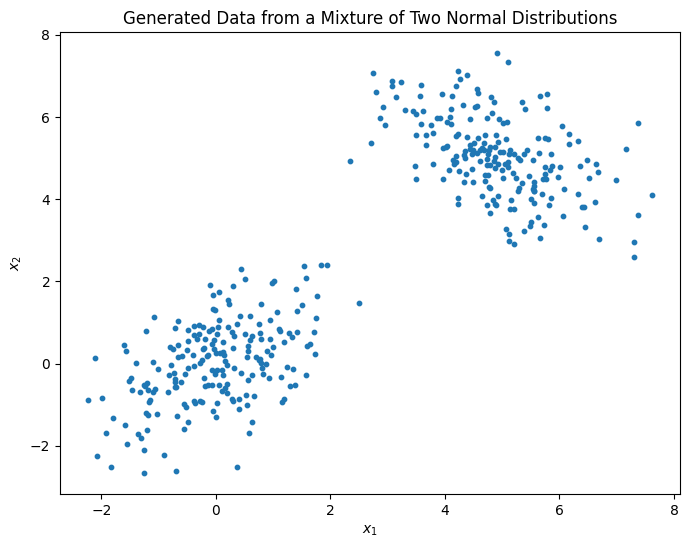

Recall that a **univariate normal distribution** for a single variable $x$ is defined by its mean $\mu$ and variance $\sigma^2$, and its probability density function is given by:
$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
In two dimensions, a **multivariate normal distribution** for a vector $\mathbf{x} = [x_1, x_2]^\top$ is defined by a mean vector $\boldsymbol{\mu} = [\mu_1, \mu_2]^\top$ and a $2 \times 2$ covariance matrix $\boldsymbol{\Sigma}$. The probability density function is:
$$f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^2 |\boldsymbol{\Sigma}|}} e^{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})}$$
where $|\boldsymbol{\Sigma}|$ is the determinant of the covariance matrix. The covariance matrix describes the variance of each component and the covariance between them.

A **mixture of normal distributions** is a probabilistic model that assumes the data is generated from a combination of several normal distributions. In our case, with two clusters, the probability distribution of a data point $\mathbf{x}$ is a weighted sum of the probability densities of two normal distributions:
$$p(\mathbf{x}) = \pi_1 \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1) + \pi_2 \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2)$$
where $\pi_1$ and $\pi_2$ are the mixing coefficients (prior probabilities of a data point belonging to each cluster, with $\pi_1 + \pi_2 = 1$), and $\mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ is the probability density function of the $k$-th normal distribution with mean $\boldsymbol{\mu}_k$ and covariance matrix $\boldsymbol{\Sigma}_k$.

Now, let's generate some data points that follow this kind of distribution. We will define the means and covariance matrices for our two clusters and then sample points from each distribution.

In [ ]:
# Solution code for generating and plotting data
import numpy
import matplotlib.pyplot as plt

# Define the parameters for the two normal distributions
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]  # Covariance matrix for cluster 1

mean2 = [5, 5]
cov2 = [[1, -0.5], [-0.5, 1]] # Covariance matrix for cluster 2

# Number of data points for each cluster
n_samples = 200

def generate_data():
  # TODO
  return []

def plot_data(x):
  # TODO
  pass

## [Optional] Part V: L1-Loss

Derive the normal equations for a L1-loss
\begin{align*}
  \mathcal{L}(\mathbf{w}) = \sum^n_{i=1} |y_i - \mathbf{x}_i^\top \mathbf{w} |
\end{align*}

This is challenging! Read some resources, or ask for help if you're stuck!